# IE582 Homework 2
## Fatih Kubilay Yavuz

## Importing necessary packages

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part 1

### Reading the data


In [64]:
musk_=pd.read_csv("Musk1.csv",header=None)
musk_.columns=["bag_class","bag_id"]+["feature_"+str(i) for i in list(range(1,len(musk_.columns)-1))]
musk_.head()

,bag_class,bag_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


### Scaling the data in order to execute PCA and MDS

In [65]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
musk_scaled=musk_.copy()
musk_scaled.iloc[:,2:]=scaler.fit_transform(musk_.iloc[:,2:])
musk_scaled.head()

,bag_class,bag_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,0.180913,-0.882527,-0.430628,-1.205030,-0.163966,0.225832,0.372274,-1.264914,...,-0.258452,1.457495,-0.170444,-1.446426,-0.864767,-1.010863,-0.787632,-0.179463,0.556386,-0.068615
1,1,1,0.180913,-0.803181,-0.908198,-1.072468,-0.163966,0.704464,0.616523,-2.348040,...,-0.258452,-1.090779,1.382981,-1.446426,-0.876232,-0.990545,-0.787632,-0.179463,0.539129,-0.068615
2,1,1,0.180913,-0.803181,-0.908198,-1.205030,-0.163966,0.225832,0.616523,-2.229160,...,-0.258452,1.468672,-0.154006,-1.446426,-0.864767,-1.010863,-0.787632,-0.179463,0.539129,-0.050142
3,1,1,0.180913,-0.882527,-0.445100,-1.072468,-0.163966,0.704464,0.372274,-1.357376,...,-0.258452,-1.090779,1.382981,-1.446426,-0.876232,-1.010863,-0.787632,-0.179463,0.556386,-0.068615
4,1,2,0.180913,-0.882527,-0.329325,-1.205030,-0.163966,0.214954,0.381668,-1.251705,...,-0.258452,1.468672,-0.154006,1.163490,1.038376,1.305388,-0.893034,0.257970,0.694440,-0.142508


### 1.a) Applying PCA and MDS

In [69]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(musk_scaled.values[:,2:])
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.787850,8.664480,2.433177,-8.109256,0.140986,-2.405274,-3.270312,-2.071979,1.298017,0.190015,...,0.007543,-0.013526,0.014519,-0.024674,-0.017464,-0.001812,-0.002813,-0.005190,0.000657,0.020014
1,0.782505,8.544104,2.636037,-7.014406,1.095515,-1.003332,-1.930490,-3.730391,-2.053357,0.231909,...,-0.006991,0.020445,0.019475,-0.009235,0.011180,0.008855,0.004708,-0.030824,0.013715,-0.014772
2,0.248081,8.360294,2.454432,-8.106509,0.831239,-1.724215,-2.348840,-2.719549,-0.212979,-1.345179,...,0.002031,0.000701,-0.003512,-0.014265,-0.004289,0.006144,0.012507,-0.016620,0.007936,0.001630
3,1.356422,9.106098,2.639127,-7.042917,0.458120,-1.659686,-2.814254,-3.161062,-0.602714,1.735087,...,0.012054,0.012064,-0.000427,-0.000049,-0.011664,0.003368,0.002310,-0.003612,0.015828,0.009178
4,1.459051,8.685006,-0.016682,-8.001193,2.830049,-1.576117,-0.336930,-0.404053,1.770947,-0.086806,...,0.026580,-0.003757,0.005568,-0.006953,0.014492,-0.018932,-0.025934,0.002795,-0.010131,0.014194


In [7]:
from sklearn.manifold import MDS

embedding=MDS(n_components=2)
mds_df=embedding.fit_transform(musk_scaled.values[:,2:])
mds_df = pd.DataFrame(data = mds_df
             , columns = ['mds_1', 'mds_2'])
mds_df.head()

,mds_1,mds_2
0,-3.435554,12.532188
1,6.727695,-10.873725
2,6.112211,-10.931047
3,7.675133,-11.104284
4,7.470531,-10.302542


In [8]:
pca.explained_variance_

array([51.88128199, 23.15904633])

In [9]:
mds_df["bag_class"]=musk_["bag_class"]
principal_df["bag_class"]=musk_["bag_class"]

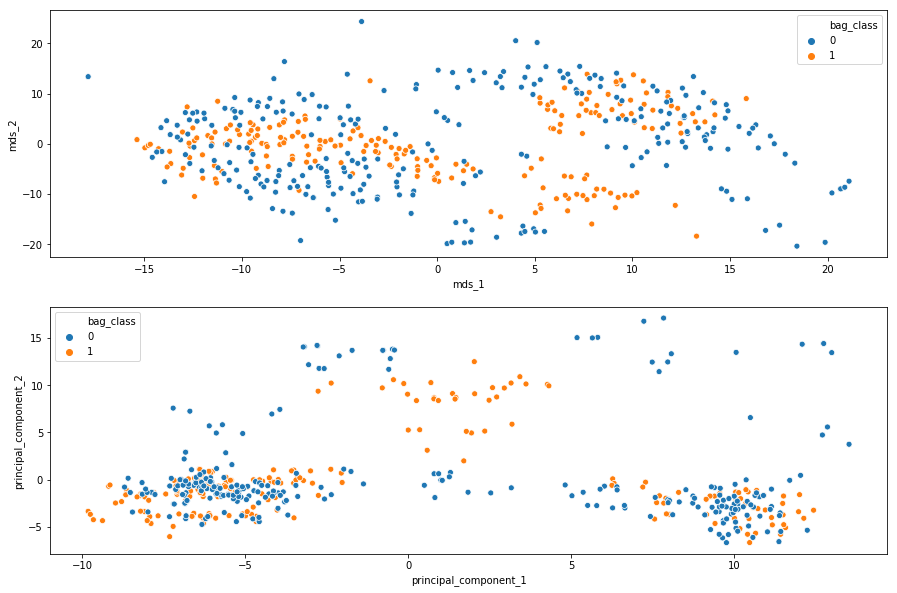

In [10]:
fig,ax=plt.subplots(2,figsize=(15,10))
sns.scatterplot(x="mds_1",y="mds_2",hue="bag_class",data=mds_df,ax=ax[0])
sns.scatterplot(x="principal_component_1",y="principal_component_2",hue="bag_class",data=principal_df,ax=ax[1])

### 2.b) Grouping the data respect to their bag id's

In [11]:
musk_agg=musk_scaled.groupby("bag_id").mean()
musk_agg=musk_agg.reset_index()
musk_agg.bag_class=musk_agg.bag_class.astype(int)
musk_agg.head()

,bag_id,bag_class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,0.180913,-0.842854,-0.673031,-1.138749,-0.163966,0.465148,0.494398,-1.799872,...,-0.258452,0.186152,0.610378,-1.446426,-0.870500,-1.005783,-0.787632,-0.179463,0.547758,-0.063997
1,2,1,0.180913,-0.842854,-0.618761,-1.138749,-0.163966,0.465148,0.496747,-1.793268,...,-0.258452,0.202917,0.622707,1.163490,1.021179,1.295229,-0.898304,0.242347,0.694440,-0.133272
2,3,1,0.180913,-0.519801,-0.336561,-0.615131,-0.146529,0.160565,0.414548,-1.984796,...,-0.218742,1.641910,0.515857,0.583508,0.952391,1.092049,-0.629530,0.101744,0.487359,-0.318005
3,4,1,0.217809,-0.391335,0.027646,-0.771995,-0.163966,0.349116,0.359748,-1.846103,...,-0.247863,0.697484,0.766543,-0.841007,-0.815087,-0.983772,-0.738445,-0.262784,0.544882,-0.025511
4,5,1,1.260113,0.540042,-0.329325,-0.545536,2.730564,0.312856,0.428639,-1.998005,...,-0.254481,0.974106,0.392570,0.461407,0.439344,1.158083,-0.355486,0.461064,0.448531,0.056080


In [12]:
emb_agg=MDS(n_components=2)
pca_agg=PCA(n_components=2)
mds_agg_df=emb_agg.fit_transform(musk_agg.iloc[:,2:])
pca_agg_df=pca_agg.fit_transform(musk_agg.iloc[:,2:])
mds_agg_df = pd.DataFrame(data = mds_agg_df
             , columns = ['mds_1', 'mds_2'])
pca_agg_df = pd.DataFrame(data = pca_agg_df
             , columns = ['principal_component_1', 'principal_component_2'])

In [13]:
mds_agg_df["bag_class"]=musk_agg["bag_class"]
pca_agg_df["bag_class"]=musk_agg["bag_class"]

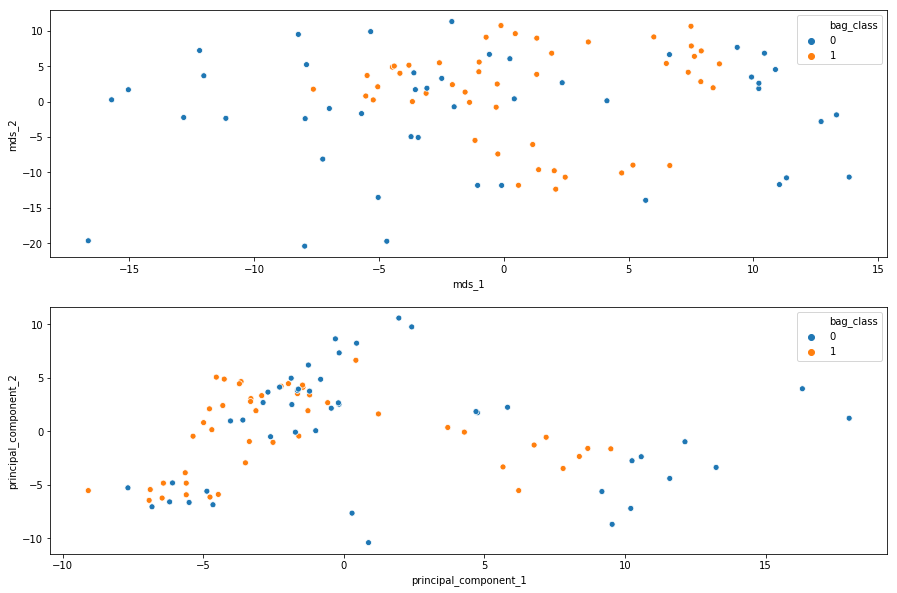

In [14]:
fig,ax=plt.subplots(2,figsize=(15,10))
sns.scatterplot(x="mds_1",y="mds_2",hue="bag_class",data=mds_agg_df,ax=ax[0])
sns.scatterplot(x="principal_component_1",y="principal_component_2",hue="bag_class",data=pca_agg_df,ax=ax[1])

In [15]:
#bonus soru here

# Task 2

In [71]:
import cv2

## 1) Reading Image and Displaying

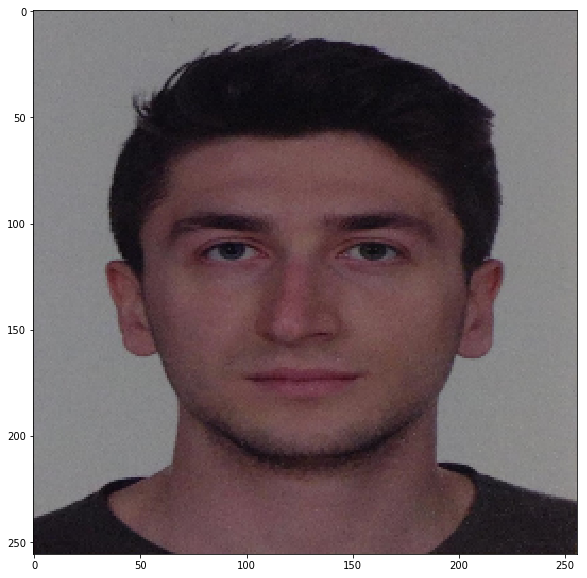

In [72]:
pic=cv2.imread("vesikalik_me.jpeg")
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
pic=cv2.resize(pic,(256,256))
plt.figure(figsize=(10,10))
plt.imshow(pic,cmap="gray")

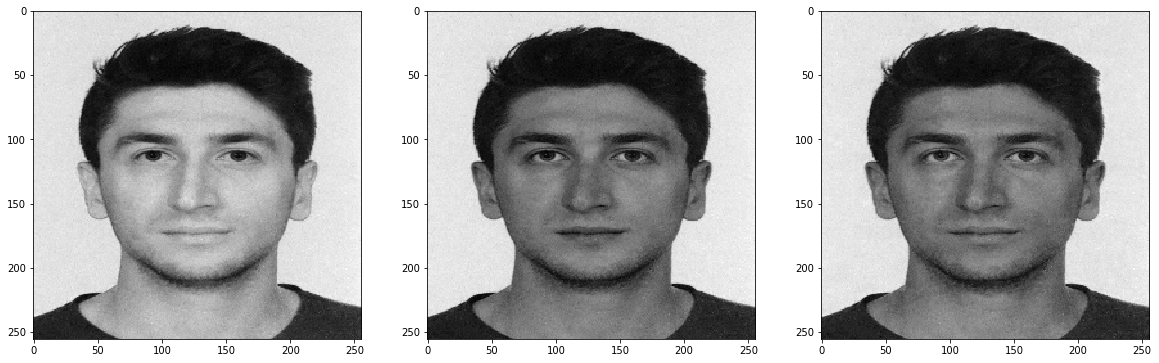

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
for i in range(3):
    ax[i].imshow(pic[:,:,i],cmap="gray")

## 2) Adding random noise to the image
### 2.a) Displaying the noisy image

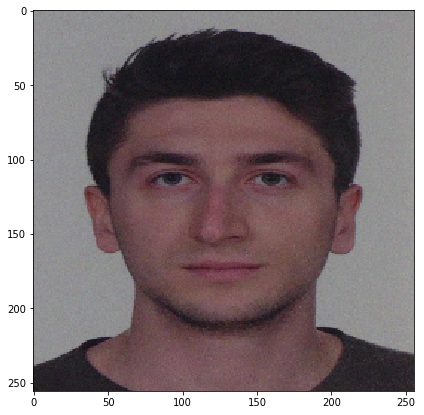

In [74]:
noise=np.random.uniform(pic.min(),pic.max()/10,size=pic.size).astype(int)
noise=noise.reshape(pic.shape)
pic_noisy=pic+noise
plt.figure(figsize=(7,7))
plt.imshow(pic_noisy)
pic_noisy=pic_noisy.astype("uint8")

### 2.b) Displaying the channels of the noisy image 

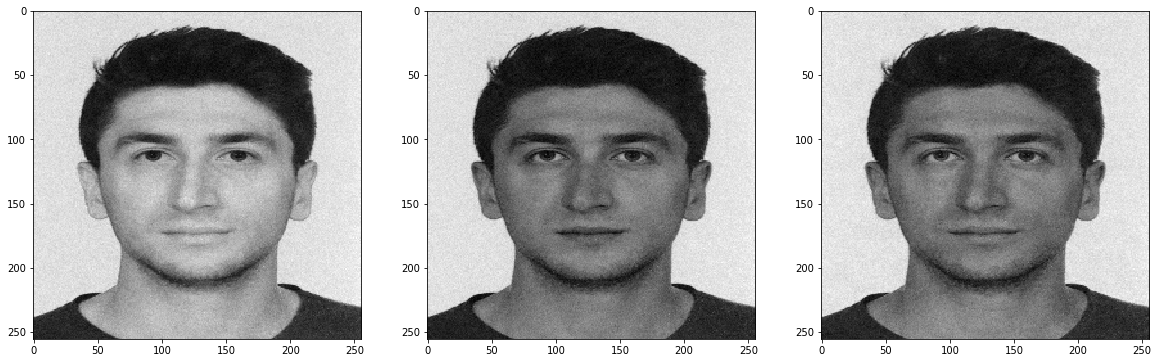

In [75]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
for i in range(3):
    ax[i].imshow(pic_noisy[:,:,i],cmap="gray")

## 3) Transform the noisy image to grayscale and display it, then create 25x25 patches

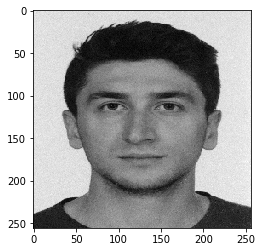

In [138]:
pic_noisy_g=cv2.cvtColor(pic_noisy,cv2.COLOR_RGB2GRAY)
plt.imshow(pic_noisy_g,cmap="gray")

Image shape: (256, 256)
Patches shape: (53824, 25, 25)


c:\python\python36\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


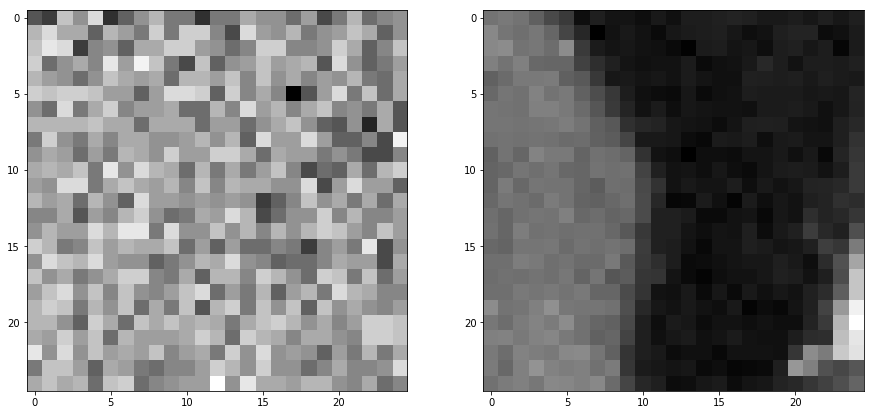

In [112]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
print('Image shape: {}'.format(pic_noisy_g.shape))
patches = image.extract_patches_2d(pic_noisy_g, (25, 25))
print('Patches shape: {}'.format(patches.shape))
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(patches[1],cmap="gray")
ax[1].imshow(patches[22000],cmap="gray")

## 3.a) Applying PCA to the scaled image

In [115]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler_ben = StandardScaler()
patches=patches.reshape((53824,625))
patches=scaler.fit_transform(patches)

In [114]:
pic_pca=PCA()
patches_pca=pic_pca.fit_transform(patches)
patches_pca=pd.DataFrame(patches_pca)
patches_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,-31.300466,-1.560472,0.398505,-0.666767,1.966187,0.579092,0.144968,0.191516,-0.014232,-0.162307,...,-0.038020,-0.003692,0.021508,0.054367,0.044712,0.036692,-0.027521,0.011381,0.047102,0.033106
1,-31.296675,-1.582374,0.386435,-0.666516,2.010417,0.643733,0.116314,0.203727,0.015624,-0.168620,...,0.005729,0.011378,0.087251,-0.088655,-0.067423,-0.029314,0.027303,0.011398,-0.046732,-0.028721
2,-31.267607,-1.583301,0.357339,-0.660841,2.027920,0.664266,0.100670,0.203237,0.042690,-0.133587,...,-0.001049,-0.023591,-0.154737,0.076408,0.053246,-0.037093,-0.037512,-0.017054,0.056803,0.026838
3,-31.226439,-1.574980,0.328652,-0.665325,2.051825,0.647481,0.070358,0.206214,0.055708,-0.089753,...,0.016710,0.021832,0.137688,-0.025572,0.028168,0.096549,0.046638,0.014976,-0.073418,-0.030785
4,-31.152622,-1.583446,0.295812,-0.675380,2.022761,0.593326,0.032707,0.211108,0.078336,-0.067917,...,-0.038240,-0.009173,-0.065561,-0.028197,-0.118466,-0.060024,-0.049369,0.001092,0.075675,0.035352


In [116]:
# cumulative yap bunu
pic_pca.explained_variance_ratio_.sum()
# eigenvalues
pic_pca.explained_variance_
""

''

### 3.b) Plotting the first, second and third scores of the image

Text(0.5,1,'Third Score')

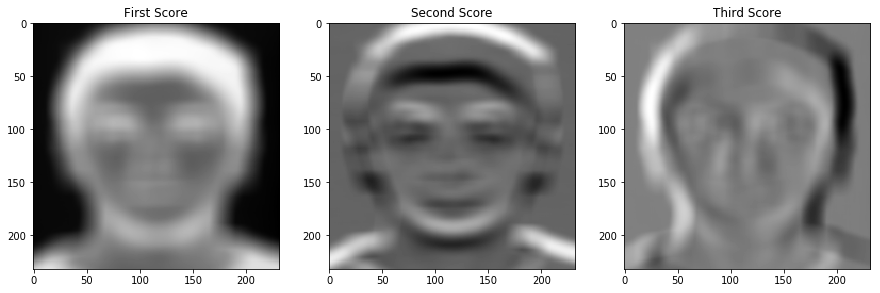

In [135]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(patches_pca[0].values.reshape((232,232)),cmap="gray")
ax[1].imshow(patches_pca[1].values.reshape((232,232)),cmap="gray")
ax[2].imshow(patches_pca[2].values.reshape((232,232)),cmap="gray")
ax[0].set_title("First Score")
ax[1].set_title("Second Score")
ax[2].set_title("Third Score")

### 3.c) Plotting the components of the PCA applied image

Text(0.5,1,'Third Component')

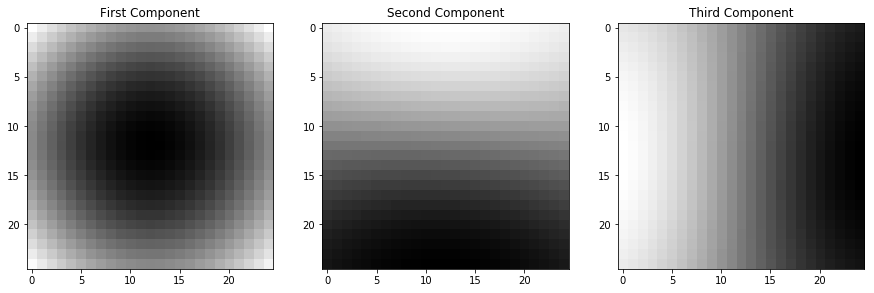

In [136]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(pic_pca.components_[0].reshape((25,25)),cmap="gray")
ax[1].imshow(pic_pca.components_[1].reshape((25,25)),cmap="gray")
ax[2].imshow(pic_pca.components_[2].reshape((25,25)),cmap="gray")
ax[0].set_title("First Component")
ax[1].set_title("Second Component")
ax[2].set_title("Third Component")